# STA 208: Homework 4 (Do not distribute)

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Recall that a Mercer kernel is a similarity function $k(x,x')$ such that the matrix $K_{ij} = ( k(x_i,x_j) )_{ij}$ is positive semidefinite regardless of dataset $\{x_i\}_{i=1}^n \subset \mathbb R^p$.


1. (6 pts) Suppose that the spectral decomposition of $K$ is $K = U \Lambda U^\top$ where $U$ is $n \times n$ and $\Lambda$ is diagonal.  What do we know about $\Lambda$ and why?

1. (9 pts) Consider ridge regression with objective,
$$
\min_{\beta \in \ell_2} \frac 12 \sum_{i=1}^n ( y_i - \Phi(x_i)^\top \beta )^2 + \lambda \| \beta\|_2^2.
$$
rewrite the above as an optimization over $\alpha \in \mathbb R^n$ using the kernel trick (this gives you kernel ridge regression).

1. (6 pts) Suppose that the kernel matrix has spectral decomposition $K = U \Lambda U^\top$.  Write the solution to the kernel ridge regression as a function of $\Lambda, U, y$.  What does this tell you about the effect of the eigenvalues on the solution (suppose that you only increase one of the eigenvalues).

1. (9 pts) Check if the following notions of similarity are Mercer kernels,
 1. $k(x,x') = x^\top x'$
 1. $k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ 
 1. $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ where the sentence structure is the sequence of parts-of-speech for each word/phrase.  For example, "The cat ran around the house." is "noun verb preposition noun" has the same structure as "Steve forgot about the homework".

# My answers to Exercise 1

## Exercise 1.1

We comprehend that $\Lambda$ is Positive definite. This means that all the eigenvalues are non-negative numbers. This is esteemed from the fact that $k(x, x')$ is a positive semidefinite bilinear term for each $x_i$ and $x_j$ or in another terms the $K_{ij}$ matrix is positive semi-definite. So we have $\forall x$:

$$
\begin{align*}
0   &\leq  v_i^\top K_{ij} v_j \\
    &\leq \sum_i \sum_j v_i K_{ij} v_j \\
    &\leq \sum_i \sum_j \sum_k v_i U_{ik} d_k U_{jk}^\top v_j\\
    &\leq \sum_k d_k \big( \sum_i v_i U_{ik}\big)\big( \sum_j U_{jk}^\top v_j \big)\\
    &\leq \sum_k d_k \|U_k^\top v\|_2^2
\end{align*}
$$
The aforementioned expression is always true if and only if all the $d_k$ are positive. This proves that $\Lambda$ will have positive diagonal elements. 


## Exercise 1.2

We know that $\Phi(x_i) = Z_i$, $K=ZZ^\top$, and $\beta = Z^\top \alpha$.

So the kernel ridge regression can be easily rewritten as:
$$
\min_{\beta \in \ell_2} \frac 12 \sum_{i=1}^n ( y_i - \Phi(x_i)^\top \beta )^2 + \lambda \| \beta\|_2^2\\

\min_{\alpha} \frac 12 \sum_{i=1}^n ( y_i - Z_i^\top Z^\top \alpha )^2 + \lambda \| Z^\top \alpha\|_2^2\\

\min_{\alpha} \frac 12 \sum_{i=1}^n ( y_i - (K \alpha)_i )^2 + \lambda (\alpha^\top Z)(Z^\top \alpha)\\

\min_{\alpha} \frac 12 \sum_{i=1}^n ( y_i - (K \alpha)_i )^2 + \lambda \alpha^\top K \alpha\\
$$

## Exercise 1.2.1

In order to find the minimizer for the Kernel Ridge Regression loss, we find the $\alpha$ for which:
$$
\hat \alpha = \arg \min R_n(y, K\alpha)
$$\

We rewrite the risk as :

$$
\begin{align*}
C(\alpha)   &= \frac 12 \sum_{i=1}^n ( y_i - (K \alpha)_i )^2 + \lambda \alpha^\top K \alpha\\
            &= \frac 12 \| y- K\alpha \|_2^2 + \frac 12 \lambda \alpha^\top K \alpha\\
            &= \frac 12 \big( y^\top - \alpha^\top K^\top \big) \big(y- K\alpha  \big) + \frac 12 \lambda \alpha^\top K \alpha \\
            &= \frac 12 \big( y^\top y -2 \alpha^\top K^\top y + \alpha^\top K^\top K \alpha \big) + \frac 12 \lambda \alpha^\top K \alpha
\end{align*}
$$

We know that the minimizer for $C(\alpha)$ is the  $\hat \alpha = \arg \min_\alpha C(\alpha) => \nabla_\alpha C(\hat \alpha) = 0 $

We find the gradient of $C(\alpha)$ and we set it to zero. Also we note that the Kernel matrix is symmetric, so $K^\top = K$:

$$
\nabla_\alpha C( \alpha) = \frac{\partial}{\partial \alpha} C(\alpha) = \frac 12 \big( -2 K^\top y + K^\top K \alpha + \lambda K \alpha \big) := 0\\

K^\top K \alpha = \lambda K \alpha = 2 K^\top y \\
K(K^\top + \lambda I_N) \alpha = 2 K^\top y
$$

Finally the solution for this Regression has a closed form :

$$
\hat \alpha = 2 (K+ \lambda I_N)^{-1} y
$$

Now we substitute $U \Lambda U^\top$ instead of $K$:
$$
\hat \alpha = 2 (U \Lambda U^\top + \lambda I_N)^{-1} y
$$

So we find out that the solution $\hat \alpha$ has relation with the inverse of the $\Lambda matrix$.
As such by increasing any elements in the $\Lambda$ matrix, the inverse term will be smaller :

$$d_i \rightarrow d_i + \epsilon \quad \text{where}\quad \epsilon > 0$$
$$
U \Lambda U^\top + \lambda I_N  \rightarrow U \Lambda U^\top + U_{ii}^2 \epsilon + \lambda I_N 
$$
So:
$$
(U \Lambda U^\top + \lambda I_N)^{-1} y > (U \Lambda U^\top + U_{ii}^2 \epsilon + \lambda I_N)^{-1}\\

\hat \alpha > \hat \alpha _2
$$

## Exercise 1.2.3

So basically we need to see whether these three kernels are PSD so $v^\top K v \geq 0 \;\;\; \forall v$.

$$
k(x, x') = x^\top x'\\
k(x_i, x_j) = x_i^\top x_j\\
K = X^\top X\\
$$

$$
\sum_{ij} v_i K_{ij} v_j = \sum_{ij} v_i x_i^\top x_j vj = \sum_{i j k} v_i x_{ik}^\top x_{jk} v_j = \sum_k \big(\sum_i v_i x_{ik}^\top \big) \big(\sum_j x_{jk} v_j\big) \\ = \sum_k \| x_k^\top v\|_2^2 \geq 0\\
\
$$
So yes this is a Mercer Kernel

## Exercise 1.2.4

$k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ 

$K=X\begin{pmatrix}
1 & 0\\
0 & -1\\
\end{pmatrix}X^\top
$. 

Now, $\forall v\in \mathbb R^{n}$, $v^\top K v= (X^\top v)^\top \begin{pmatrix}
1 & 0\\
0 & -1\\
\end{pmatrix} (X^\top v)$. Here $u=X^\top v$ can be any vector size of 2. 

If we assme $u=\begin{pmatrix}
0\\
1
\end{pmatrix},
$ then the value is $v^\top K v=u^\top  \begin{pmatrix}
1 & 0\\
0 & -1\\
\end{pmatrix} u =-1<0$. So $u = \begin{pmatrix}
0\\
1
\end{pmatrix},$
is the an example to reject the conditioin of the Mercer Kernel.

So No this is not a Mercer Kernel

## Exercise 1.2.5

Here $k(s, s') = 1 $  if $s$ and $s'$ have the same sentence structure. so $K$ will be a sparse matrix with 1 and 0 elemtns.
To test whether $K$ is PSD,

$$
\forall v \in \mathbb{R}^n, \quad v^\top K v = \sum_{ij} v_i K_{ij} v_i
$$

Now we note  that the $K$ matrix has 0 and 1 elements where $K_{ij} = \left\{ \begin{array}{lcl} 1, \quad s_i, s_j \; \;  \text{have the same sentence structure} \\ 0, \quad s_i, s_j \; \;  \text{don't have the same sentence structure} \end{array} \right.$

So the condition will be :
$$
\sum_{ij} v_i K_{ij} v_i = \sum_{i,j: \;\; \text{first cond.}} v_i \cdot 1\cdot v_i + \sum_{i,j: \;\; \text{second cond.}} v_i \cdot 0\cdot v_i\\
= \sum_{i,j: \;\; \text{first cond.}} v_i^2 \geq 0
$$

So the condition is positive and as such $K$ is a mercer kerel.

__Exercise 2__ (30 pts)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset.  I want you to act like the dataset is from the same experiment. 

1. (15 pts) Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. (15 pts) Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

# My answers to Exercise 2

## Exercise 2.1

In [0]:
import pandas as pd 
import numpy as np
import re
from sklearn import decomposition, cluster
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from itertools import chain
from sklearn.preprocessing import StandardScaler

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20,10

In [0]:
lines = []
# read the raw file and remove the header
with open('poses.csv', 'r') as input_file:
    lines = [line for line in input_file]
lines = lines[1:]

numbers = [re.findall (r'\b[0-9]+\.?[0-9]*\b', line) for line in lines]
def toFloat (strings):
    return [float(s) for s in strings]
numbers = [toFloat(line) for line in numbers]
# so we have a list of numbers

poses = pd.read_csv('poses.csv', dtype = str)
datamat = np.array(numbers)
poses.iloc[:, :8] = datamat

poses.head()

Unnamed: 0 # Columns: time avg_rss12 var_rss12 avg_rss13 var_rss13  \
0          0               0        42         0      11.5      4.56   
1          1             250     41.75      0.43      21.5       1.8   
2          2             500     41.67      0.47      9.33      5.44   
3          3             750        40      0.82     12.67      0.94   
4          4            1000     40.25      0.83     12.25      0.43   

  avg_rss23 var_rss23     task       filename  
0      18.5      0.87  sitting  dataset14.csv  
1     11.75      1.48  sitting  dataset14.csv  
2        12      2.83  sitting  dataset14.csv  
3     17.75      1.09  sitting  dataset14.csv  
4     18.25      0.43  sitting  dataset14.csv

In [0]:
poses.task = poses.task.replace(to_replace=['bending1','bending2'], value='bending')
task_category=poses.task.unique()

In [0]:
poses.rename(columns={poses.columns.values[0]:'Id', poses.columns.values[1]:'time'}, inplace=True)

In [0]:
idx = np.array(np.where(poses.time != 0)) -1
idx = np.array( list(chain.from_iterable(idx)))

scaler = StandardScaler()
pmat = np.array(poses)[1:,2:8]-np.array(poses)[:-1,2:8]
pmat = pmat[idx, :]
pmat_std = scaler.fit_transform(pmat)


In [0]:
tasks = []
for i in np.arange(0,poses.shape[0]):
    if poses.loc[i, "task"] == "sitting":
        tasks.append(0)
    if poses.loc[i, "task"] == "lying":
        tasks.append(1)
    if poses.loc[i, "task"] == "walking":
        tasks.append(2)
    if poses.loc[i, "task"] == "standing":
        tasks.append(3)
    if poses.loc[i, "task"] == "cycling":
        tasks.append(4)
    if poses.loc[i, "task"] == "bending":
        tasks.append(5)
tasks = np.array(tasks)[idx + 1]

In [0]:
pca = decomposition.PCA( n_components = 2)
pca.fit(pmat_std)
print("percentage of variance by these two principal components")
print(pca.explained_variance_ratio_)
print("the eigen values of the covariance matrix")
print(pca.singular_values_)
print("the eigen vectors")
print(pca.components_[0], pca.components_[1])

percentage of variance by these two principal components
[0.22883488 0.21926367]
the eigen values of the covariance matrix
[240.56956195 235.48481462]
the eigen vectors
[-0.13640888 -0.23678405  0.60520909 -0.59936489  0.32546848 -0.30639824] [ 0.09096216 -0.09258837  0.32555174 -0.31339504 -0.62657949  0.62157142]


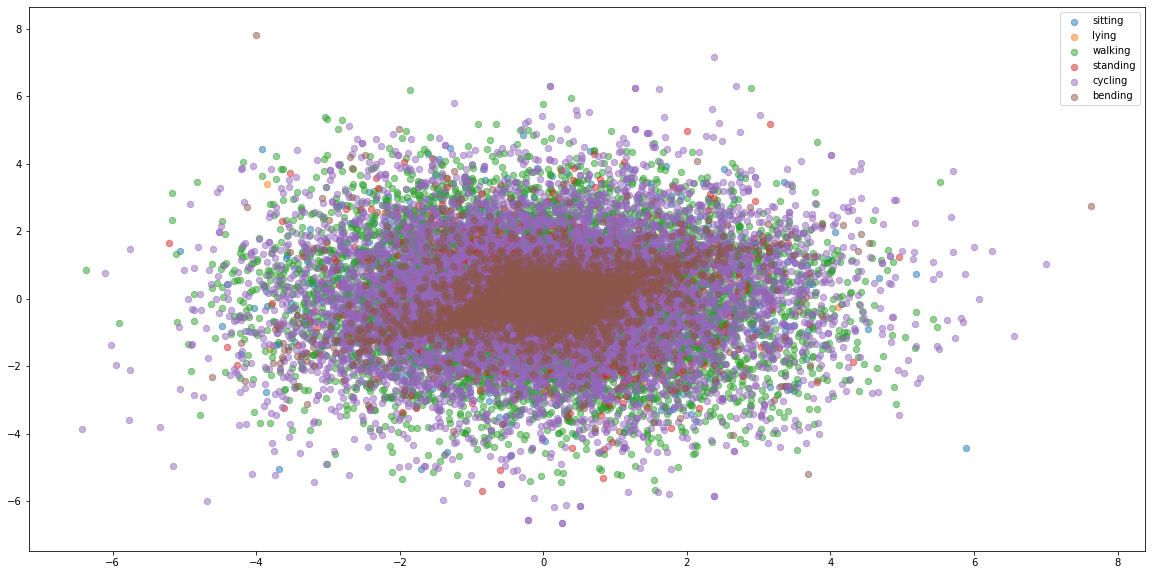

In [0]:
#create  the projected matrix form the 2 pcas
pmat_proj = pca.fit_transform(pmat_std)
labels = ["sitting", "lying", "walking", "standing", "cycling", "bending"]
for i in range(0,6):
    idx_i = np.array(np.where(tasks == i)) -1
    idx_i = np.array(list(chain.from_iterable(idx_i)))
    plt.scatter(pmat_proj[idx_i, 0], pmat_proj[idx_i, 1], label=labels[i], alpha=0.5,cmap="hsv",s=40)
plt.legend()

## Exercise 2.2

In [0]:
#knn with 6 clusters
KNN = cluster.KMeans(n_clusters = 6)
KNN.fit(pmat_std)
clusterd = KNN.labels_

Confusion matrix, without normalization


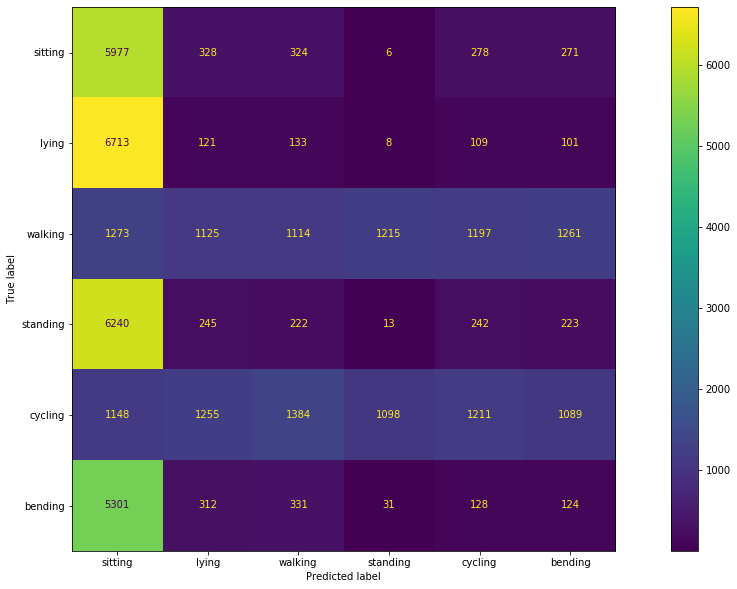

Normalized confusion matrix


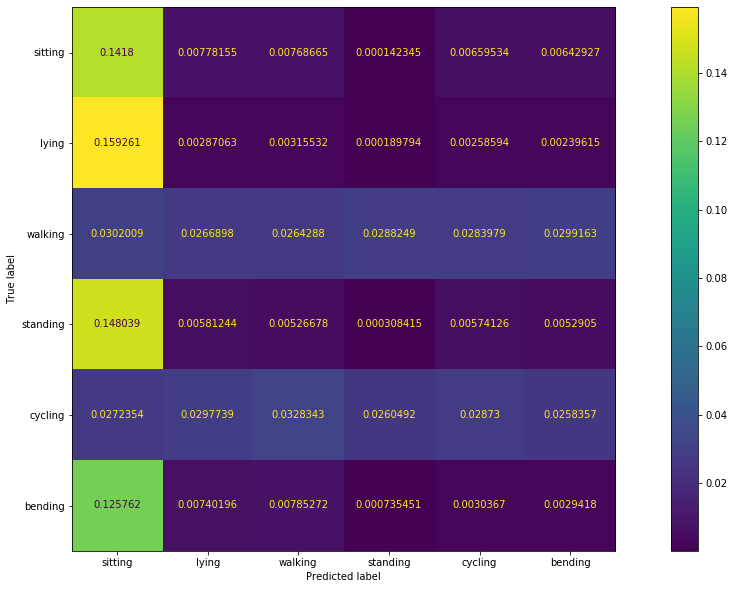

In [0]:
# Plot unnormalized and normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'all')]
for title, normalize in titles_options:
    cm = confusion_matrix(y_true = tasks, y_pred = clusterd, normalize = normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    print(title)

    disp = disp.plot(values_format='g')
    plt.show()

In [0]:
acc = accuracy_score(y_true = tasks, y_pred = clusterd)
print("the accuracy is", acc)

the accuracy is 0.20307940499632274


We can see that the model performs horribly after the PCA compression

__Exercise 3__ (30 pts)

To introduce a simple neural network and learn some tensorflow we will use the following simulated dataset.  Throughout feel free to use the keras API, optimizers, etc.  You should only need to train this using the CPU.

# My answers to Exercise 3

In [113]:
import numpy as np
import pandas as pd
import plotnine as p9
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import model_selection

from tensorflow import keras
from tensorflow.keras import layers, Sequential, losses

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 6,8


print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.2.0
Eager execution: True


In [0]:
n = 10000
X = np.random.uniform(0,1,(n,2))
p = 1 / (1 + np.exp(-5*(X.sum(axis=1) - 2.* (X[:,0] * X[:,1] > .25) - .5)))
y = np.random.uniform(0,1,n) < p

In [0]:
XOR_data = pd.DataFrame(X,columns=['X0','X1'])
XOR_data['p'] = p

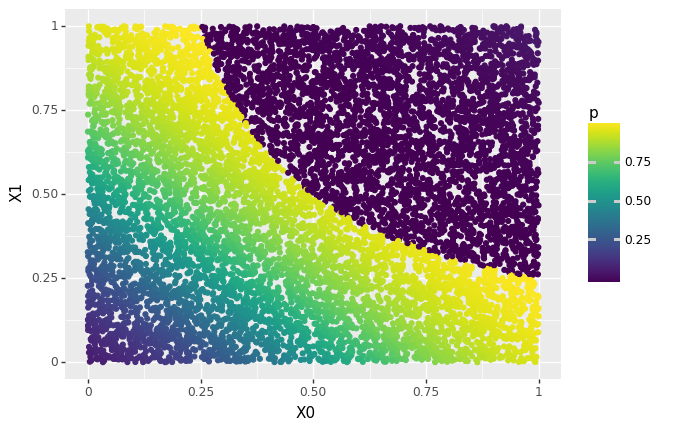

<ggplot: (8781902346560)>

In [40]:
p9.ggplot(XOR_data,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()

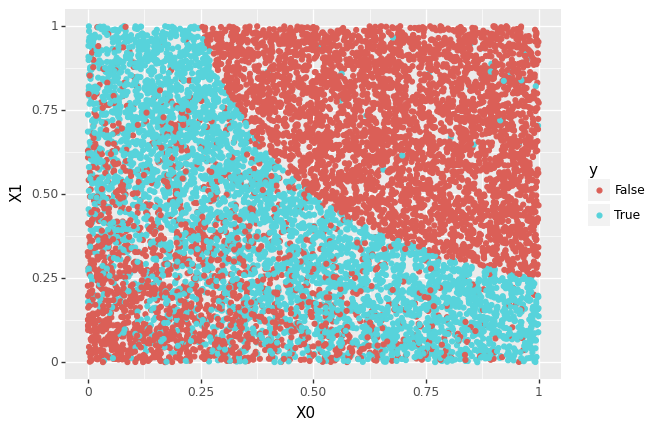

<ggplot: (-9223363254952508363)>

In [41]:
p9.ggplot(XOR_data,p9.aes(x='X0',y='X1',color='y')) + p9.geom_point()

Create a neural net with dense hidden layers (including intercepts for each hidden unit) and logistic loss function.  Train it on the above dataset with 2 dimensional input using Adam and 32 minibatch size.  You may want to increase the number of iterations until you see convergence.  You can assess visually by plotting the predictions and comparing to the true probability.

1. (10 pts) Try ReLu activation as well as sigmoid activation for 1 hidden layer and 3 units.
2. (10 pts) Try ReLu activation with 2 hidden layers and 3 units each.
3. (10 pts) Try (2) but with any combination of ReLu and Sigmoid activation.

## Exercise 3.1

In [116]:
print(XOR_data.head())
print(y[:5])

         X0        X1         p
0  0.247881  0.766583  0.929059
1  0.334075  0.011734  0.316272
2  0.566277  0.078972  0.673981
3  0.177311  0.676131  0.854110
4  0.166511  0.884848  0.940296
[ True False  True  True  True]


In [117]:
XOR_data.describe()

X0            X1             p
count  10000.000000  10000.000000  10000.000000
mean       0.499040      0.502289      0.425225
std        0.287725      0.286360      0.389813
min        0.000194      0.000045      0.000554
25%        0.247369      0.254830      0.004980
50%        0.500360      0.504208      0.426230
75%        0.750747      0.747381      0.839047
max        0.999824      0.999823      0.976229

In [122]:
print(y.shape)
y = 1.0*y
print(y)
# Y has only one dimension so this is binary classification

(10000,)
[1. 0. 1. ... 1. 1. 1.]


In [124]:
#  Split the training data to train and validate 20% validate 80% train
# we ignore validate for now
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(XOR_data, y, test_size = 0.02)
print (X_tr.shape , y_tr.shape)
print (X_te.shape, y_te.shape)

(9800, 3) (9800,)
(200, 3) (200,)


In [125]:
X_tr['y'] = y_tr
X_te['y'] = y_te
X_tr.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


X0           X1            p            y
count  9800.000000  9800.000000  9800.000000  9800.000000
mean      0.499493     0.502086     0.425263     0.429796
std       0.287735     0.286023     0.389896     0.495072
min       0.000194     0.000045     0.000554     0.000000
25%       0.247869     0.255233     0.004948     0.000000
50%       0.501089     0.504208     0.425408     0.000000
75%       0.750955     0.746426     0.839327     1.000000
max       0.999824     0.999823     0.976229     1.000000

In [126]:
X_tr.head()

X0        X1         p    y
7337  0.711290  0.010620  0.752045  1.0
3465  0.016772  0.114415  0.136572  1.0
6554  0.524795  0.726882  0.001943  0.0
690   0.903695  0.179374  0.948600  1.0
4753  0.663077  0.143352  0.822320  0.0

In [127]:
X_te.head()

X0        X1         p    y
8123  0.913738  0.246325  0.964440  1.0
5238  0.249163  0.846536  0.951593  1.0
6102  0.351971  0.132530  0.480636  0.0
718   0.339680  0.331531  0.701836  0.0
9371  0.145277  0.111084  0.228254  0.0

In [0]:
# using tensorflows API to convert the Pandas dataframe to tensorflow's dataset format choosing only X0 and X1 for train and 
train_dataset = tf.data.Dataset.from_tensor_slices((X_tr.values[:,:-2],X_tr.values[:,-1]))
test_dataset =  tf.data.Dataset.from_tensor_slices((X_te.values[:,:-2],X_te.values[:,-1]))

batch_size = 32

train_dataset = train_dataset.shuffle(200)
train_dataset = train_dataset.batch(batch_size)

test_dataset = test_dataset.shuffle(200)
test_dataset = test_dataset.batch(batch_size)

In [129]:
X,y = next(iter(train_dataset))
X

<tf.Tensor: shape=(32, 2), dtype=float64, numpy=
array([[0.00316912, 0.52281767],
       [0.52079569, 0.02041027],
       [0.41322118, 0.69603624],
       [0.52496861, 0.86215282],
       [0.8821459 , 0.69031465],
       [0.34029934, 0.61178777],
       [0.03993197, 0.60752638],
       [0.66307713, 0.14335242],
       [0.22796899, 0.35540094],
       [0.52479142, 0.74046275],
       [0.08167824, 0.82936768],
       [0.8924064 , 0.20908675],
       [0.90482053, 0.36579638],
       [0.15087884, 0.41616252],
       [0.99409172, 0.39126372],
       [0.95189766, 0.04954869],
       [0.82480837, 0.39682489],
       [0.33334985, 0.42086484],
       [0.97004596, 0.80281877],
       [0.32061101, 0.56906446],
       [0.06187652, 0.05351117],
       [0.92376822, 0.81541595],
       [0.26111659, 0.4616693 ],
       [0.44569647, 0.49003497],
       [0.20241709, 0.29001327],
       [0.77448101, 0.10081976],
       [0.90771523, 0.03605298],
       [0.00397745, 0.40105636],
       [0.72418716, 0.85934

In [130]:
train_dataset.element_spec

(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [0]:
## Create the losses 
logistic_loss = losses.SparseCategoricalCrossentropy(from_logits=True)

# logistic_loss = losses.BinaryCrossentropy(from_logits=True)


In [0]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training= training)

  return logistic_loss(y,logits)


In [0]:
## Gradient tape lets TF know with respect to what to take gradients inputs = X an targets = Y
def grad(model, inputs, targets):
  with tf.GradientTape() as tape: # getting gradient tapes for the automatix differentiation
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
def x_with_ppreds(X,model):
    x_df = pd.DataFrame(X.numpy())
    p_preds = tf.nn.softmax(model(X)).numpy()[:,1]
    x_df['p_pred'] = p_preds
    return x_df

## First Model

In [136]:
# the first model with relu activation function and 3 units in the hidden layer
model = Sequential([
  layers.Dense(3, input_dim = 2, activation="relu"), 
  layers.Dense(2)
])

# model = Sequential([
#   layers.Dense(3, input_dim = 2, activation="relu"), 
#   layers.Dense(1)
# ])
logits = model(X)
print(model.summary())

print(logistic_loss(y, logits))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None
tf.Tensor(0.7166367769241333, shape=(), dtype=float64)


In [137]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999)

loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True)
.numpy()))

Step: 0, Initial Loss: 0.7166367769241333
Step: 1,         Loss: 0.6969937086105347


In [138]:
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 101

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  # epoch_accuracy = tf.keras.metrics.BinaryAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 10 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.571, Accuracy: 69.276%
Epoch 010: Loss: 0.539, Accuracy: 70.408%
Epoch 020: Loss: 0.527, Accuracy: 70.398%
Epoch 030: Loss: 0.529, Accuracy: 69.929%
Epoch 040: Loss: 0.527, Accuracy: 70.031%
Epoch 050: Loss: 0.531, Accuracy: 70.388%
Epoch 060: Loss: 0.529, Accuracy: 70.276%
Epoch 070: Loss: 0.527, Accuracy: 70.092%
Epoch 080: Loss: 0.530, Accuracy: 70.163%
Epoch 090: Loss: 0.530, Accuracy: 69.980%
Epoch 100: Loss: 0.529, Accuracy: 70.755%


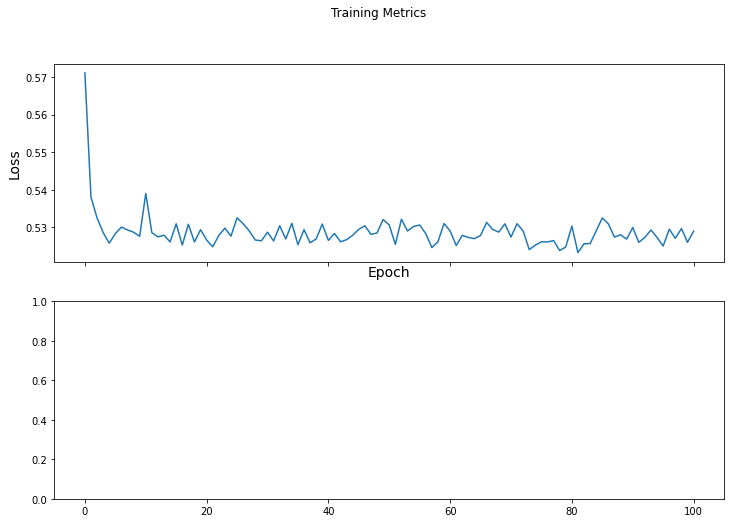

In [140]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[0].set_xlabel("Epoch", fontsize=14)

# axes[1].set_ylabel("Accuracy", fontsize=14)
# axes[1].set_xlabel("Epoch", fontsize=14)
# axes[1].plot(train_accuracy_results)
plt.show()

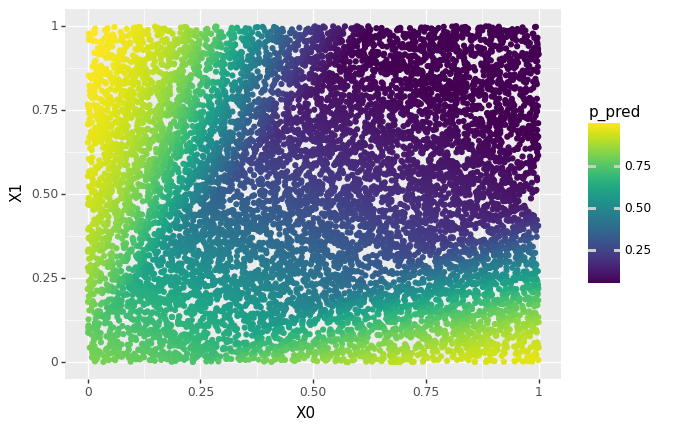

<ggplot: (8781901201917)>

In [150]:
pred_df = pd.concat(x_with_ppreds(X,model) for X,y in train_dataset)
pred_df.rename(columns={pred_df.columns.values[0]:'X0', pred_df.columns.values[1]:'X1'}, inplace=True)
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p_pred')) + p9.geom_point()

In [142]:
#now we evaluete on the test dataset
test_dataset.element_spec

(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [143]:
X,y = next(iter(test_dataset))
print(y)
prediction = model(X, training=False)
print(prediction)

tf.Tensor(
[0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1.], shape=(32,), dtype=float64)
tf.Tensor(
[[-2.69819481 -1.80706186]
 [ 1.00670605 -1.27935408]
 [-1.64228786 -1.48819712]
 [-1.40448384 -1.62279206]
 [-2.07808614 -0.59658069]
 [-1.62287137  0.22131956]
 [-3.14969271 -1.41381193]
 [-0.05617651 -1.35135951]
 [-1.3975013  -1.58585519]
 [-2.99547313 -1.20086307]
 [ 0.81362524 -1.30685556]
 [-2.53254084 -0.99489121]
 [-1.43269278 -1.57680946]
 [-2.3386535   0.51354298]
 [ 1.24536122 -1.24536122]
 [-2.74030012 -1.54983294]
 [-2.96625484 -1.53065458]
 [-1.67898801 -1.66189108]
 [ 0.25731817 -1.38609319]
 [-0.86784545 -0.92381853]
 [ 1.24536122 -1.24536122]
 [-0.25620747 -1.45923724]
 [-0.85797083 -1.31432475]
 [-1.38065474 -0.6880621 ]
 [ 1.24536122 -1.24536122]
 [-1.44698394 -1.19386327]
 [ 0.17058604 -1.39844689]
 [-1.42348773 -0.52814162]
 [ 1.24536122 -1.24536122]
 [-2.63954183 -0.88329626]
 [-1.14290854 -1.58553456]
 [-1.6657419 

In [144]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()
preds =[]
for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)
  preds = preds + [prediction]

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 68.000%


## Second Model





In [158]:
# the first model with softmax activation function and 3 units in the hidden layer
model = Sequential([
  layers.Dense(3, input_dim = 2, activation="softmax"), 
  layers.Dense(2)
])

X,y = next(iter(train_dataset))
logits = model(X)
print(model.summary())

print(logistic_loss(y, logits))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None
tf.Tensor(0.6573795080184937, shape=(), dtype=float64)


In [159]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999)

loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True)
.numpy()))

Step: 0, Initial Loss: 0.6573795080184937
Step: 1,         Loss: 0.636374294757843


In [160]:
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 101

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  # epoch_accuracy = tf.keras.metrics.BinaryAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 10 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.550, Accuracy: 70.265%
Epoch 010: Loss: 0.403, Accuracy: 80.959%
Epoch 020: Loss: 0.392, Accuracy: 81.500%
Epoch 030: Loss: 0.388, Accuracy: 81.633%
Epoch 040: Loss: 0.385, Accuracy: 81.816%
Epoch 050: Loss: 0.386, Accuracy: 81.622%
Epoch 060: Loss: 0.385, Accuracy: 81.724%
Epoch 070: Loss: 0.382, Accuracy: 81.847%
Epoch 080: Loss: 0.382, Accuracy: 81.857%
Epoch 090: Loss: 0.381, Accuracy: 81.878%
Epoch 100: Loss: 0.380, Accuracy: 81.908%


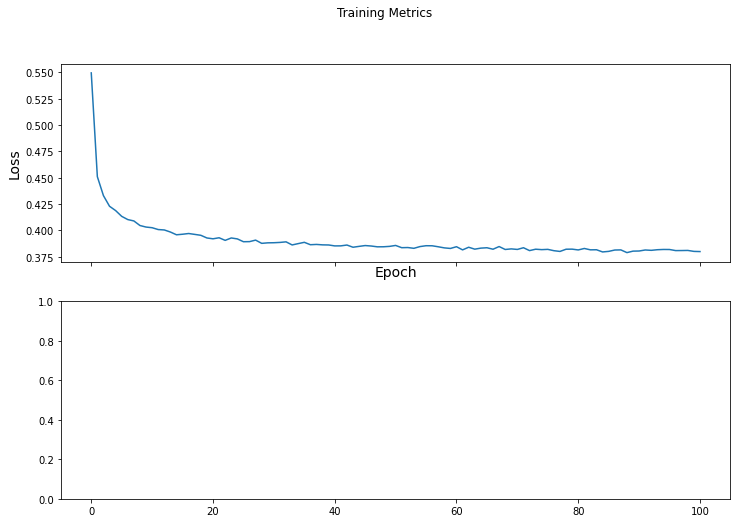

In [162]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[0].set_xlabel("Epoch", fontsize=14)

# axes[1].set_ylabel("Accuracy", fontsize=14)
# axes[1].set_xlabel("Epoch", fontsize=14)
# axes[1].plot(train_accuracy_results)
plt.show()

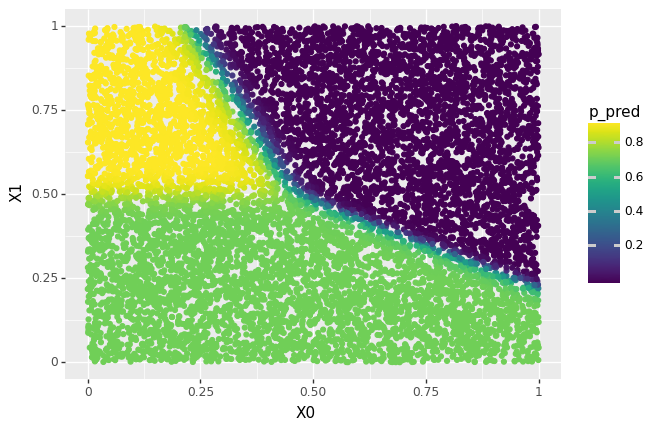

<ggplot: (-9223363254952731809)>

In [163]:
pred_df = pd.concat(x_with_ppreds(X,model) for X,y in train_dataset)
pred_df.rename(columns={pred_df.columns.values[0]:'X0', pred_df.columns.values[1]:'X1'}, inplace=True)
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p_pred')) + p9.geom_point()

In [164]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()
preds =[]
for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)
  preds = preds + [prediction]

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 78.000%


## Exercise 3.2

In [152]:
# the second model with relu activation function and 3 units in each hidden layer
model = Sequential([
  layers.Dense(3, input_dim = 2, activation="relu"), 
  layers.Dense(3, activation="relu"), 
  layers.Dense(2)
])
X,y = next(iter(train_dataset))
logits = model(X)
print(model.summary())

print(logistic_loss(y, logits))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 8         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
None
tf.Tensor(0.6936549544334412, shape=(), dtype=float64)


In [153]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999)

loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True)
.numpy()))

Step: 0, Initial Loss: 0.6936549544334412
Step: 1,         Loss: 0.6911069750785828


In [154]:
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 101

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  # epoch_accuracy = tf.keras.metrics.BinaryAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 10 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.651, Accuracy: 63.847%
Epoch 010: Loss: 0.414, Accuracy: 80.663%
Epoch 020: Loss: 0.416, Accuracy: 80.316%
Epoch 030: Loss: 0.413, Accuracy: 80.551%
Epoch 040: Loss: 0.410, Accuracy: 80.684%
Epoch 050: Loss: 0.416, Accuracy: 80.541%
Epoch 060: Loss: 0.412, Accuracy: 80.949%
Epoch 070: Loss: 0.408, Accuracy: 80.878%
Epoch 080: Loss: 0.415, Accuracy: 80.510%
Epoch 090: Loss: 0.411, Accuracy: 80.653%
Epoch 100: Loss: 0.411, Accuracy: 81.031%


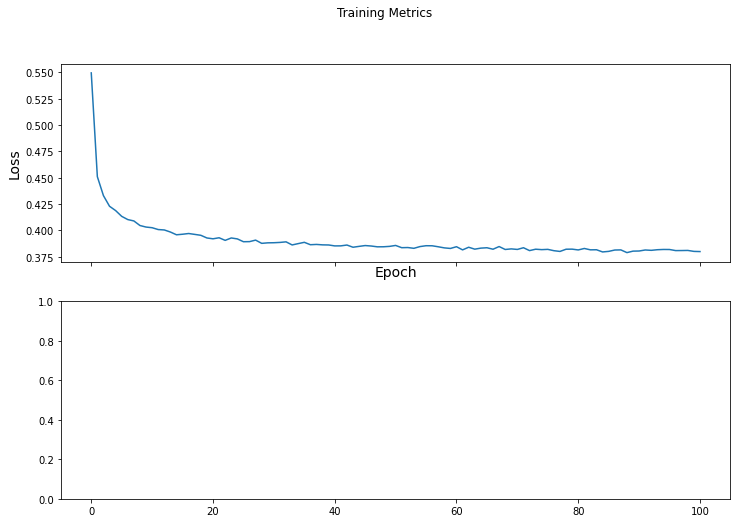

In [161]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[0].set_xlabel("Epoch", fontsize=14)

# axes[1].set_ylabel("Accuracy", fontsize=14)
# axes[1].set_xlabel("Epoch", fontsize=14)
# axes[1].plot(train_accuracy_results)
plt.show()

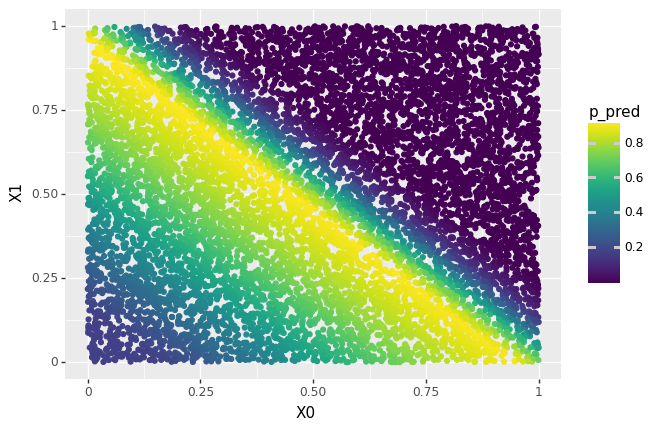

<ggplot: (8782026582571)>

In [156]:
pred_df = pd.concat(x_with_ppreds(X,model) for X,y in train_dataset)
pred_df.rename(columns={pred_df.columns.values[0]:'X0', pred_df.columns.values[1]:'X1'}, inplace=True)
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p_pred')) + p9.geom_point()

In [157]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()
preds =[]
for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)
  preds = preds + [prediction]

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 80.500%


## Exercise 3.3

In [165]:
# the model with relu activation function in the first layer and softmax in the second and 3 units in each hidden layer
model = Sequential([
  layers.Dense(3, input_dim = 2, activation="relu"), 
  layers.Dense(3, activation="softmax"), 
  layers.Dense(2)
])
X,y = next(iter(train_dataset))
logits = model(X)
print(model.summary())

print(logistic_loss(y, logits))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 8         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
None
tf.Tensor(0.696622908115387, shape=(), dtype=float64)


In [166]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999)

loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True)
.numpy()))

Step: 0, Initial Loss: 0.696622908115387
Step: 1,         Loss: 0.6855142116546631


In [167]:
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 101

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
  # epoch_accuracy = tf.keras.metrics.BinaryAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 10 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.522, Accuracy: 72.082%
Epoch 010: Loss: 0.469, Accuracy: 76.663%
Epoch 020: Loss: 0.466, Accuracy: 76.500%
Epoch 030: Loss: 0.463, Accuracy: 76.714%
Epoch 040: Loss: 0.466, Accuracy: 76.735%
Epoch 050: Loss: 0.464, Accuracy: 76.929%
Epoch 060: Loss: 0.464, Accuracy: 76.796%
Epoch 070: Loss: 0.466, Accuracy: 76.612%
Epoch 080: Loss: 0.464, Accuracy: 76.633%
Epoch 090: Loss: 0.463, Accuracy: 76.857%
Epoch 100: Loss: 0.464, Accuracy: 76.684%


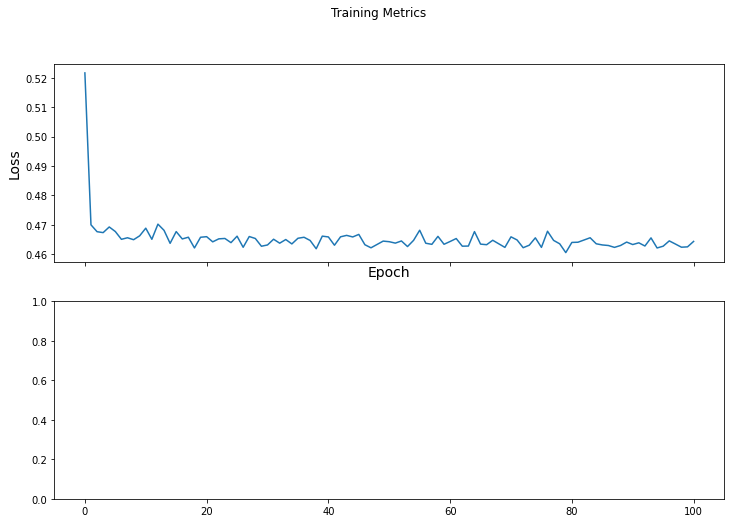

In [168]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[0].set_xlabel("Epoch", fontsize=14)

# axes[1].set_ylabel("Accuracy", fontsize=14)
# axes[1].set_xlabel("Epoch", fontsize=14)
# axes[1].plot(train_accuracy_results)
plt.show()

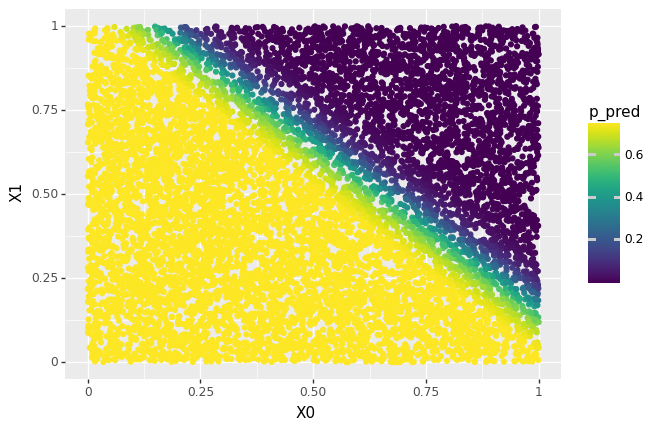

<ggplot: (-9223363254953953725)>

In [169]:
pred_df = pd.concat(x_with_ppreds(X,model) for X,y in train_dataset)
pred_df.rename(columns={pred_df.columns.values[0]:'X0', pred_df.columns.values[1]:'X1'}, inplace=True)
p9.ggplot(pred_df,p9.aes(x='X0',y='X1',color='p_pred')) + p9.geom_point()

In [170]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()
preds =[]
for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)
  preds = preds + [prediction]

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 73.500%


__Exercise 4__ (60 pts)


Load the housing.csv dataset, your task is to predict the Sale price.  Deal with the missing data by simple imputation and by creating missingness indicator variables.  Train random forests, gradient tree boosting (XGBoost), K-nearest neighbors, and kernel SVMs.  Also, train a multilayer perceptron as in exercise 3, with multiple choices of depth, width, and activation functions.  Compare them using appropriate cross-validation.

# My answers to Exercise 4

In [0]:
import pandas as pd 
import numpy as np
import re
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from tensorflow import keras
from tensorflow.keras import layers, Sequential, losses

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20,10

In [173]:
housing=pd.read_csv("housing.csv")
print(housing.dtypes.unique())
housing.head()

[dtype('int64') dtype('O') dtype('float64')]


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [174]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [175]:
housing.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [176]:
# evaluating the nans
isNulls = housing.isnull().values == True
numNulls = np.sum(isNulls)
print("the count of nulls is = ", numNulls)
print("the columns with NaNs are:")
c = 0
for column in housing.columns:
    tmp = np.sum(housing[column].isnull().values == True)
    if tmp:
        print(column, "with", tmp, "elements")
        c += 1
print("total of ",c,"columns")

the count of nulls is =  6965
the columns with NaNs are:
LotFrontage with 259 elements
Alley with 1369 elements
MasVnrType with 8 elements
MasVnrArea with 8 elements
BsmtQual with 37 elements
BsmtCond with 37 elements
BsmtExposure with 38 elements
BsmtFinType1 with 37 elements
BsmtFinType2 with 38 elements
Electrical with 1 elements
FireplaceQu with 690 elements
GarageType with 81 elements
GarageYrBlt with 81 elements
GarageFinish with 81 elements
GarageQual with 81 elements
GarageCond with 81 elements
PoolQC with 1453 elements
Fence with 1179 elements
MiscFeature with 1406 elements
total of  19 columns


In [0]:
# replace the nans
for column in housing.columns:
    if housing[column].dtype == "int64":
        housing[column] = housing[column].fillna(np.mean(housing[column]))
    if housing[column].dtype == "O":
        housing[column] = housing[column].fillna("Unknown")
    if housing[column].dtype == "float64":
        housing[column] = housing[column].fillna(np.mean(housing[column]))

In [178]:
# test to see if there is still any NaNs remaining
housing[housing.isnull().values == True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [0]:
#standaridizing the data
scaler = StandardScaler()

for column in housing.columns:
    if housing[column].dtype == "int64":
        housing[column] = scaler.fit_transform( np.array(housing[column]).reshape(-1, 1) )
    if housing[column].dtype == "float64":
        housing[column] = scaler.fit_transform( np.array(housing[column]).reshape(-1, 1) )

In [0]:
# creating the dataset and labels form the data frame
X = housing.drop(["SalePrice"], axis=1)
X = pd.get_dummies(X)
X = X.values
X = X[ :, 1:]
y = housing["SalePrice"]
y = y.values


In [0]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X, y)

for the cross validation i am going to use the K fold cross validation technique with K = 5 folds

In [0]:
CVK = 5

## Exercise 4.1 Randoom Forest

In [0]:
# for better exploration, we are going to use a parameter grid to test many aspects
params = {
    "max_features" : [10, 20, 30],
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [4, 8, 12, 16, 20, 32, 64]
}
rf = RandomForestRegressor()
rf_grid = model_selection.GridSearchCV(estimator= rf, param_grid= params, cv= CVK)
rf_grid.fit(X_tr ,y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
print ("the parameters for the best model in Random Forest Regressor are:")
params = rf_grid.best_estimator_.get_params()
print("max_depth is", params['max_depth'])
print("max_features is", params['max_features'])
print("n_estimators is", params['n_estimators'])
print ("with training score of", rf_grid.best_score_)
print("the score of evaluation of the test set is", rf_grid.best_estimator_.score(X_te, y_te))

the parameters for the best model in Random Forest Regressor are:
max_depth is 16
max_features is 30
n_estimators is 50
with training score of 0.8381950879722868
the score of evaluation of the test set is 0.8813388327200231


## Exercise 4.2 Gradient Tree boosting

In [0]:
params = {
    "max_depth" : [10, 20, 30],
    "learning_rate": [0.01, 0.05, 0.1],
    "reg_lambda": [0.1, 0.2, 0.5, 1],
    "reg_alpha": [0.1, 0.2, 0.5, 1]
}
xgb = XGBRegressor()
xgb_grid = model_selection.GridSearchCV(estimator= xgb, param_grid= params, cv= CVK)
xgb_grid.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=Non

In [0]:
print ("the parameters for the best model in Gradient Tree Boosting Regressor are:")
params = xgb_grid.best_estimator_.get_params()
print("max_depth is", params['max_depth'])
print("learning_rate is", params['learning_rate'])
print("reg_lambda is", params['reg_lambda'])
print("reg_alpha is", params['reg_alpha'])
print ("with training score of", xgb_grid.best_score_)
print("the score of evaluation of the test set is", xgb_grid.best_estimator_.score(X_te, y_te))

the parameters for the best model in Gradient Tree Boosting Regressor are:
max_depth is 10
learning_rate is 0.1
reg_lambda is 0.2
reg_alpha is 0.2
with training score of 0.843446035278909
the score of evaluation of the test set is 0.8621705021173564


## Exercise 4.3 K-nearest Neghbors

In [0]:
params = {
    "n_neighbors" : [5, 10, 15, 20, 30, 35, 40, 45, 50]
}
knn = KNeighborsRegressor()
knn_grid = model_selection.GridSearchCV(estimator= knn, param_grid= params, cv= CVK)
knn_grid.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15, 20, 30, 35, 40, 45, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print ("the parameters for the best model in K-nearest Neghbors Regressor are:")
params = knn_grid.best_estimator_.get_params()
print("n_neighbors is", params['n_neighbors'])
print ("with training score of", knn_grid.best_score_)
print("the score of evaluation of the test set is", knn_grid.best_estimator_.score(X_te, y_te))

the parameters for the best model in K-nearest Neghbors Regressor are:
n_neighbors is 15
with training score of 0.7600321455401862
the score of evaluation of the test set is 0.7996230752008093


## Exercise 4.4 Kernel SVM

In [0]:
params = {
    "C" : [0.01, 0.1, 0.2, 0.5, 1, 2, 5],
    "kernel" : ["rbf","poly","sigmoid", "linear"],
    "gamma" : ["scale"]
}
svm = SVR()
svm_grid = model_selection.GridSearchCV(estimator= svm, param_grid= params, cv= CVK)
svm_grid.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 1, 2, 5],
                         'gamma': ['scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print ("the parameters for the best model in Support Machine Vecotor Regressor are:")
params = svm_grid.best_estimator_.get_params()
print("C is", params['C'])
print("kernel is", params['kernel'])
print("gamma is", params['gamma'])
print ("with training score of", svm_grid.best_score_)
print("the score of evaluation of the test set is", svm_grid.best_estimator_.score(X_te, y_te))

the parameters for the best model in Support Machine Vecotor Regressor are:
C is 5
kernel is rbf
gamma is scale
with training score of 0.8421673147207602
the score of evaluation of the test set is 0.8803054362657086


## Exercise 4.5 MLP

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



In [0]:
# depth, width, and activation functions
# 10
# 20
# 10 | 10
# 10 | 20
# 20 | 10
# 20 | 20

models = []
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(20, activation="sigmoid"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(20, activation="sigmoid"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="relu"))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)

model = Sequential()
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="relu"))
model.compile(loss='mean_squared_error', optimizer='adam')
models.append(model)



In [0]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, activation='relu'))
	model.add(Dense(1))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=CVK)
results = cross_val_score(estimator, X_tr, y_tr, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [0]:
for model in models:
  

In [0]:


mlp =
mlp_grid = model_selection.GridSearchCV(estimator= mlp, param_grid= params, cv= CVK)
mlp_grid.fit(X_tr, y_tr)

In [0]:
print ("the parameters for the best model in Multi Later Perceptron Regressor are:")
params = mlp_grid.best_estimator_.get_params()
print("depth is", params['C'])
print("width is", params['kernel'])
print("activation functions is", params['gamma'])
print ("with training score of", mlp_grid.best_score_)
print("the score of evaluation of the test set is", mlp_grid.best_estimator_.score(X_te, y_te))